# Statistique exploratoire

Les méthodes factorielles ont pour but de traiter et visualiser des données multidimensionnelles. La prise en compte simultanée de l'ensemble des variables est un problème difficile, rendu parfois plus simple car l'information apportée par les variables est redondante. Les méthodes factorielles visent alors à exploiter cette redondance pour tenter de remplacer les variables initiales par un nombre réduit de nouvelles variables, conservant au mieux l'information initiale.

Les principales méthodes de ce type incluent l'analyse factorielle des correspondances, l'analyse des correspondances multiples, l'analyse factorielle d'un tableau de distance (pour les tableaux de proximité) ou encore l'analyse factorielle discriminante.

## Analyse en composantes principales

Pour les données quantitatives, l'Analyse en Composantes Principales (ACP) est l'une des méthodes les plus utilisées. Elle considère que les nouvelles variables sont des combinaisons linéaires des variables initiales, non corrélées. 

![](./images/acpintro.png)


Dans la suite, les données seront des tableaux $n\times p$ de variables quantitatives, une ligne étant un individu, et les colonnes décrivant les paramètres mesurés. Les observations de $p$ variables sur $n$ individus sont donc rassemblées dans une matrice ${\bf X}\in\mathcal{M}_{np}(\mathbb{R})$ .  On notera $x^j$ la j-ème variable, identifiée par la j-ème colonne ${\bf X_{\bullet,j}}$ de ${\bf X}$, et $\mathbf{e_i}$ le i-ème individu (i.e. ${\bf X_{i,\bullet}^T}$).
 
### Principe de la méthode
#### Pré-traitement du tableau
 En analyse en composantes principales, on raisonne souvent sur des variables centrées et/ou réduites.
##### Données centrées
 Notons $\mathbf{g} = \left ( \bar{x}^1\cdots \bar{x}^p\right )$ le vecteur des moyennes arithmétiques de chaque variable (centre de gravité) : 
 
 $\mathbf{g}={\bf X^TD\mathbf{1}}$
 
 où ${\bf D}$ est une matrice diagonale de poids,  chaque $d_{ii}$ donnant l'importance de l'individu $i$ dans les données (le plus souvent ${\bf D}=\frac{1}{n}{ \mathbb{I}}$),  et $\mathbf{1}$ est le vecteur de $\mathbb{R}^n$ dont toutes les composantes sont égales à 1. Le tableau ${\bf Y}={\bf X}-\mathbf{1}\mathbf{g}^T=({ \mathbb{I}}-\mathbf{1}\mathbf{1}^T{\bf D}){\bf X}$ est le tableau centré associé à ${\bf X}$.

##### Données réduites
 La matrice de variance/covariance des données centrées est égale à 
 ${\bf V} = {\bf X^TDX} - \mathbf{g}\mathbf{g^T} = {\bf Y^TDY}$.

 Si on note ${\bf D_{1/\sigma}}$ la matrice diagonale des inverses des écarts-types des variables, alors  ${\bf Z}={\bf YD_{1/\sigma}}$ 
 est la matrice des données centrées réduites. La matrice ${\bf R}={\bf D_{1/\sigma}VD_{1/\sigma}}={\bf Z^TDZ}$ 
 est la matrice de corrélation des données et résume la structure des dépendances linéaires entre les $p$ variables.
 

#### Projection des individus sur un sous-espace
Le principe de la méthode est d'obtenir une représentation approchée du nuage des $n$ individus dans un sous-espace $F_k$ de dimension faible. Ceci s'effectue par un mécanisme de projection.

Le choix de l'espace de projection est dicté par le critère suivant, qui revient à déformer le moins possible les distances en projection: le sous-espace de dimension $k$ recherché est tel que la moyenne des carrés des distances entre projections soit la plus grande possible. En définissant l'inertie d'un nuage de points comme la moyenne pondérée des carrés des distances au centre de gravité, le critère revient alors à maximiser l'inertie du nuage projeté sur $F_k$.

Soit ${\bf P}$ la projection orthogonale sur $F_k$. Le nuage de points projeté est associé au tableau ${\bf XP^T}$ puisque chaque individu $\mathbf{e_i}$ se projette sur $F_k$ selon un vecteur colonne $\mathbf{Pe_i}$ ou ligne $\mathbf{e_i P^T}$. 

La matrice de variance du tableau ${\bf XP^T}$ est, dans le cas où les variables sont centrées :
${\bf (XP^T)^TD(XP^T) }= {\bf PVP^T}$.
L'inertie du nuage projeté est donc égale à $Tr({\bf PVP^TM})$, où ${\bf M}$ est une matrice symétrique définie positive de taille $p$, définissant la distance entre deux individus

$d^2(\mathbf{e_i},\mathbf{e_j}) = (\mathbf{e_i}-\mathbf{e_j})^T{\bf M}(\mathbf{e_i}-\mathbf{e_j})$

Mais 

$\begin{eqnarray*}
Tr({\bf PVP^TM})&=&Tr({\bf PVMP})\quad \textrm{car }{\bf P^TM}={\bf MP}\\
&=& Tr({\bf VMP^2})\quad \textrm{car }Tr({\bf AB})=Tr({\bf BA})\\
&=&Tr({\bf VMP})\quad \textrm{car } P\textrm{ est une projection}
\end{eqnarray*}$

Le problème posé est donc de trouver la projection ${\bf P}$, de rang $k$ maximisant $Tr({\bf VMP})$. La projection ${\bf P}$ réalisant cette optimisation donnera alors $F_k$.

L'analyse en composantes principales consiste alors, de manière itérative, à chercher un sous-espace de dimension 1 d'inertie maximale, puis le sous-espace de dimension 1 orthogonal au précédent d'inertie maximale et ainsi de suite. Elle s'appuie sur le résultat suivant :

```{prf:theorem}

Soit $F_k$ un sous-espace portant l'inertie maximale. Alors le sous-espace de dimension $k+1$ portant l'inertie maximale est la somme directe de $F_k$ et de la droite orthogonale à $F_k$ portant l'inertie maximale.
```
#### Elements principaux
##### Axes principaux
Rechercher un sous-espace de dimension 1 d'inertie maximale revient à rechercher une droite de $\mathbb{R}^n$ passant par le centre de gravité des données $\mathbf{g}$ maximisant l'inertie du nuage projeté sur cet axe. Soit $\mathbf{a}$ un vecteur directeur de cette droite. La projection orthogonale sur la droite est définie par la matrice de projection 

$\mathbf P=\frac{\mathbf{a}\mathbf{a}^T{\bf M}}{\mathbf{a}^T{\bf M}\mathbf{a}}$

L'inertie du nuage projeté sur $Lin(\mathbf{a})$ vaut alors
$\begin{eqnarray*}
Tr({\bf VMP})&=&Tr\left ({\bf VM}\frac{\mathbf{a}\mathbf{a}^T{\bf M}}{\mathbf{a}^T{\bf M}\mathbf{a}}\right )\\
&=& \frac{1}{\mathbf{a^T}{\bf M}\mathbf{a}}Tr({\bf VM}\mathbf{a}\mathbf{a^T}{\bf M})\\
&=& \frac{1}{\mathbf{a^T}{\bf M}\mathbf{a}}Tr(\mathbf{a^T}{\bf MVM}\mathbf{a})\quad \text{car } Tr(\mathbf{AB})=Tr(\mathbf{BA})\\
&=& \frac{1}{\mathbf{a^T}{\bf M}\mathbf{a}}\mathbf{a^T}{\bf MVM}\mathbf{a}\quad \text{car } \mathbf{a^T}{\bf MVM}\mathbf{a}\in\mathbb{R}
\end{eqnarray*}$

La matrice ${\bf MVM}$ est la matrice d'inertie du nuage (égale à la matrice de variance-covariance si ${\bf M}=\mathbb I$).  Maximiser cette quantité revient à annuler sa dérivée par rapport à $\mathbf{a}$ d'où :

$
\frac{d}{d\mathbf{a}}\frac{\mathbf{a^T}{\bf MVM}\mathbf{a}}{\mathbf{a^T}{\bf M}\mathbf{a}}=\frac{(\mathbf{a^T}{\bf M}\mathbf{a})2{\bf MVM}\mathbf{a}-(\mathbf{a^T}{\bf MVM}\mathbf{a})2{\bf M}\mathbf{a}}{(\mathbf{a^T}{\bf M}\mathbf{a})^2}
$
et donc 

${\bf MVM}\mathbf{a}=\left (\frac{\mathbf{a^T}{\bf MVM}\mathbf{a}}{\mathbf{a^T}{\bf M}\mathbf{a}} \right ){\bf M}\mathbf{a}$

soit ${\bf VM}\mathbf{a}=\lambda \mathbf{a}$ car ${\bf M}$ est de rang plein. Donc $\mathbf{a}$ est vecteur propre de ${\bf VM}$, et $\lambda$ est la plus grande des valeurs propres de ${\bf VM}$. Or ${\bf M}$ est symétrique, elle est diagonalisable sur une base de vecteurs propres orthonormés et on a le résultat suivant :

```{prf:theorem}
Le sous-espace $F_k$ de dimension $k$ portant l'inertie maximale est engendré par les $k$ premiers vecteurs propres de ${\bf VM}$
```
Les droites portées par ces vecteurs propres sont les axes principaux. Dans la suite on supposera $\mathbf{a}$ $\mathbf M$-normé.

##### Facteurs principaux
On associe à  $Lin(\mathbf{a})$ la forme linéaire $\mathbf{u}$, coordonnée orthogonale sur l'axe $Lin(\mathbf{a})$. Le vecteur $\mathbf{u}$ définit une combinaison linéaire des variables descriptives $x^1\cdots x^p$. A l'axe principal $\mathbf{a}$ est associé le facteur principal $\mathbf{u}=\mathbf{Ma}$. Puisque $\mathbf{a}$ est vecteur propre de ${\bf VM}$, on peut alors écrire 

${\bf MVM}\mathbf{a}=\lambda {\bf M}\mathbf{a}$

et donc ${\bf MV}\mathbf{u}=\lambda \mathbf{u}$.  Les facteurs principaux sont donc les vecteurs propres de ${\bf MV}$

##### Composantes principales
Les composantes principales sont les éléments de $\mathbb{R}^n$ définis par $\mathbf{c_i}=\mathbf{Xu_i}$. Ce sont donc les vecteurs coordonnées des projections orthogonales des individus sur les axes propres $\mathbf{a_i}$.  Ce sont donc les combinaisons linéaires des $x^1\cdots x^p$ de variance maximale sous la contrainte $\mathbf{u_i}^T{\bf M}\mathbf{u_i}=1$, et cette variance est égale à la valeur propre $\lambda_i$ associée à $\mathbf{a_i}$.

En pratique, l'analyse en composantes principales consiste à calculer les $\mathbf{u}$ par diagonalisation de ${\bf MV}$, puis à calculer les $\mathbf{c}=\mathbf{Xu}$. Le calcul explicite des vecteurs propres $\mathbf{a}$ n'a que peu d'intérêt.

##### Reconstitution
Il est possible de reconstituer le tableau ${\bf X}$ centré des données (ou une approximation par une matrice de rang $k$) en utilisant les composantes. En effet, puisque $\mathbf{Xu_j}=\mathbf{c_j}$ on a 

${\bf X}\displaystyle\sum_j \mathbf{u_j}\mathbf{u_j}^T{\bf M^{-1}} = \displaystyle\sum_j\mathbf{c_j}\mathbf{u_j}^T{\bf M^{-1}}$

Mais $\displaystyle\sum_j \mathbf{u_j}\mathbf{u_j}^T{\bf M^{-1}}=\mathbb{I}$  car les $\mathbf{u_j}$ sont orthonormés pour la métrique ${\bf M^{-1}}$ donc 

${\bf X}=\displaystyle\sum_j\mathbf{c_j}\mathbf{u_j}^T{\bf M^{-1}}$
et si l'on s'intéresse à l'approximation de ${\bf X}$ on ne somme que les $k$ premiers termes.

A noter que lorsque ${\bf M}=\mathbb{I}, {\bf X}= \displaystyle\sum_j\sqrt{\lambda_j}\mathbf{z_j}\mathbf{v_j^T}$ où les $\mathbf{z_j}$ sont les vecteurs propres unitaires de ${\bf XX^T}$ et les $\mathbf{v_j}$ les vecteurs propres unitaires de ${\bf X^TX}$ (décomposition en valeurs singulières).
 
### Interprétation des résultats
#### Quelle dimension pour $F_k$ ?
Le but premier de l'ACP est de réduire la dimension pour permettre une visualisation efficace des données, tout en préservant l'information (ici représentée par la variance du nuage de points).  Il faut donc se doter d'outils permettant de répondre à la question : quelle dimension pour $F_k$ ? Il n'y a pas de réponse théorique satisfaisante, l'essentiel étant d'avoir une représentation suffisamment expressive pour permettre une interprétation correcte du nuage de points.
En préambule, il convient de remarquer que la réduction de dimension ne sera possible que si les variables $x^1\cdots x^p$ ne sont pas indépendantes.


##### Critère théorique
On détermine ici si les valeurs propres sont significativement différentes entre elles à partir d'un certain rang: si la réponse est négative on conserve les
premières valeurs propres.

On fait l'hypothèse que les $n$ individus proviennent d'un tirage aléatoire dans une population gaussienne  où $\lambda_{k+1}=\cdots =\lambda_{p}$. Si l'hypothèse est vérifiée, la moyenne arithmétique $\alpha$ des $p-k$ dernières valeurs propres et leur moyenne géométrique $\gamma$ sont peu différentes. On admet que :

$c=\left ( n-\frac{2p+11}{6}\right )(p-k) ln\frac{\alpha}{\gamma}$
suit une loi du $\chi^2$ de degré de liberté $\frac{(p-k+2)(p-k-1)}{2}$ et on rejette l'hypothèse d'égalité des $p-k$ valeurs propres si $c$ est trop grand.

##### Pourcentage d'inertie
Le critère couramment utilisé est le pourcentage d'inertie totale expliquée, qui s'exprime sur les $k$ premiers axes par :

$\frac{\displaystyle\sum_{j=1}^k \lambda_j}{\displaystyle\sum_{j=1}^p \lambda_j}$
Un seuil par exemple de 90\% d'inertie totale expliquée donne une valeur de $k$ correspondante. Attention cependant, le pourcentage d'inertie doit faire intervenir le nombre de variables initiales.

![](./images/scree.png)

##### Mesures locales
Le pourcentage d'inertie expliquée est un critère global qui doit être complété par d'autres considérations. Supposons que le plan $F_2$ explique une part importante d'inertie, et que, en projection sur ce plan, deux individus soient très proches. Cette proximité peut être illusoire si les deux individus se trouvent éloignés dans l'orthogonal de $F_2$. Pour prendre en compte ce phénomène, il faut envisager pour chaque individu $\mathbf{e_i}$ la qualité de sa représentation, souvent exprimée par le cosinus de l'angle entre le plan principal et le vecteur $\mathbf{e_i}$. Si ce cosinus est grand, $\mathbf{e_i}$ est voisin du plan, on peut  alors examiner la position de sa projection sur le plan par rapport à d'autres points.

Dans la figure suivante, ${\bf e_i} $ et ${\bf e_j}$ se projettent sur $F_2$ en ${\bf p}$ mais sont éloignés dans $F_2^\perp$.

![](./images/proj.png)



##### Critères empiriques

Lorsqu'on travaille sur données centrées réduites, on retient les composantes principales correspondant à des valeurs propres supérieures à 1 (critère de Kaiser) : en effet les composantes principales $c_j$ étant des combinaisons linéaires des $z-j$ de variance maximale $V(c_j)=\lambda$, seules les composantes de variance supérieure à celle des variables initiales présentent un intérêt.


#### Interprétation des résultats : exemple

Une analyse en composantes principales est réalisée sur un jeu de données composé de 9 indicateurs de qualité pour 329 villes américaines. Les paragraphes suivants sont illustrés par ces données.

##### Corrélation variables-facteurs
Pour donner du sens aux composantes principales $\mathbf{c}$, il faut les relier aux variables initiales $x^j$ en calculant les coefficients de corrélation linéaire  $r(\mathbf{c},x^j)$ et en seuillant ces coefficients en valeur absolue.

Lorsque l'on travaille sur des données centrées réduites (métrique $\mathbf D_{1/\sigma}$), le calcul de $r(\mathbf{c},x^j)$ se réduit à 

$r(\mathbf{c},x^j)=\frac{\mathbf{c}^T\mathbf D\mathbf{z^j}}{\sqrt{\lambda}}$

Or $\mathbf{c}=Z\mathbf{u}$ où $\mathbf{u}$, facteur principal associé à $\mathbf{c}$, est vecteur propre de la matrice de corrélation $\mathbf R$ associé à $\lambda$. Donc

$r(\mathbf{c},x^j)=\frac{\mathbf{u}^T\mathbf Z^T\mathbf D\mathbf{z^j}}{\sqrt{\lambda}}=\frac{(\mathbf{z^j})^T\mathbf D\mathbf Z\mathbf{u}}{\sqrt{\lambda}}$

$(\mathbf{z^j})^T\mathbf D\mathbf Z$ est la $j^e$ ligne de $\mathbf Z^T\mathbf D\mathbf Z=\mathbf R$ donc $(\mathbf{z^j})^T\mathbf D \mathbf Z \mathbf{u}$ est la $j^e$ composante de $\mathbf R\mathbf{u}=\lambda \mathbf{u}$ d'où

$r(\mathbf{c},x^j)=\sqrt{\lambda}u_j$


Ces calculs s'effectuent pour chaque composante principale. Pour un couple de composantes principales $\mathbf{c_1}$ et $\mathbf{c_2}$ par exemple on représente fréquemment les corrélations sur une figure appelée « cercle des corrélations» où chaque variable $x^j$ est repérée par un point d'abscisse $r(\mathbf{c_1},x^j)$ et d'ordonnée $r(\mathbf{c_2},x^j)$.

![](./images/cercle.png)


```{prf:remark}
:class: dropdown
Attention de ne pas interpréter des proximités entre points variables, si ceux-ci ne sont pas proches de la circonférence.
```

Notons que dans le cas de la métrique $D_{1/\sigma}$, le cercle des corrélations est la projection de l'ensemble des variables centrées-réduites sur le sous-espace engendré par $\mathbf{c_1},\mathbf{c_2}$. En ce sens, le cercle de corrélation est le pendant, dans l'espace des variables, de la projection des individus sur le premier plan principal. 

#### Positionnement des individus
Dire que $\mathbf{c_1}$ est très corrélée à $x^j$ signifie que les individus ayant une forte coordonnée positive sur l'axe 1 sont caractérisés par une valeur de $x^j$ nettement supérieure à la moyenne. 

Il est très utile aussi de calculer pour chaque axe la contribution apportée par les divers individus à cet axe. Si $c_{ki}$ est la valeur de la composante $k$ pour le $i^e$ individu, alors par construction 

$\displaystyle\sum_{i=1}^np_ic_{ki}^2=\lambda_k$
où $p_i$ est le poids de l'individu $i$. On appelle alors contribution de l'individu $i$ à la composante $\mathbf{c_k}$ la quantité $\frac{p_ic_{ki}^2}{\lambda_k}$. Dans le cas où le poids est différent de $1/n$ (certains individus sont "plus importants" que d'autres), la contribution est riche d'interprétation. Dans le cas contraire, elle n'apporte rien de plus que les coordonnées de l'individu.

On peut alors positionner les individus sur les sous-espaces des premières composantes principales (plans factoriels). La figure suivante présente le positionnement de 329 villes américaines, où les 9 variables de qualité de vie précédentes ont été mesurées. Par soucis de lisibilité, seul les villes qui contribuent le plus à la création de la première composante principale ont leurs noms inscrits.

![](./images/individus.png)


On peut également superposer les deux informations précédentes pour corréler le positionnement des villes selon les variables originales. La figure suivante présente les 329 villes précédentes, plongées dans $F_3$, les  anciennes variables étant matérialisées par des vecteurs dont la direction et la norme indiquent à quel point chaque variable contribue aux 3 premières composantes principales.

![](./images/biplot.png)


Il n'est pas souhaitable, et ceci surtout pour les premières composantes,  qu'un individu ait une contribution excessive car cela serait un facteur d'instabilité, le fait de retirer cet individu modifiant profondément le résultat de l'analyse. Si ce cas se produisait il y aurait intérêt à effectuer l'analyse en éliminant cet individu puis en le mettant en élément supplémentaire, s'il ne s'agit pas d'une donnée erronée qui a été ainsi mise en évidence.


#### Facteur de taille, facteur de forme
Le théorème de Frobenius stipule qu'une matrice symétrique n'ayant que des termes positifs admet un premier vecteur propre dont toutes les composantes sont de même signe. Si ce signe est positif, la première composante est alors corrélée positivement avec toutes les variables et les individus sont rangés sur l'axe 1 par valeurs croissantes de l'ensemble des variables. Si de plus les corrélations entre variables sont du même ordre de grandeur, la première composante principale est proportionnelle à la moyenne des variables initiales. Cette première composante définit alors un facteur de taille.

La deuxième composante principale différencie alors des individus de "taille" semblable, on l'appelle souvent facteur de forme.

#### Ajout de variable et ou d'individu
Toutes les interprétations précédentes expliquent les résultats à l'aide des données initiales, qui ont permis de les calculer. On risque alors de prendre pour une propriété intrinsèque des données un simple artefact de la méthode (par exemple il existe de fortes corrélations entre la première composante principale et certaines variables, puisque $\mathbf{c_1}$ maximise $\sum_j r^2(\mathbf{c},x^j)$).

En revanche une forte corrélation entre une composante principale et une variable qui n'a pas servi à l'analyse sera significative. D'où la pratique courante de partager en deux groupes l'ensemble des variables: d'une part les variables actives qui servent à déterminer les axes principaux, d'autre part les variables passives ou supplémentaires que l'on relie a posteriori aux composantes principales. On distingue alors les variables supplémentaires suivant leur type, numérique (à placer dans les cercles de corrélation) ou qualitative (donnée d'une partition des $n$ individus en $k$ classes).

### Exemple
On étudie les consommations annuelles en 1972, exprimées en devises, de 8 denrées alimentaires (les variables), les individus étant 8 catégories socio-professionnelles (CSP) . Les données sont des moyennes par CSP : 

$
\begin{array}{|c|cccccccc|}
\hline
  &PAO  &PAA  &VIO& VIA&  POT&  LEC &RAI& PLP\\
\hline
AGRI  &167  &1  &163& 23& 41  &8& 6 &6\\
SAAG  &162& 2 &141& 12  &40 &12&  4&  15\\
PRIN  &119& 6 &69 &56 &39&  5 &13 &41\\
CSUP  &87 &11 &63 &111& 27& 3 &18 &39\\
CMOY  &103  &5  &68 &77 &32&  4 &11 &30\\
EMPL  &111  &4  &72 &66 &34&  6 &10 &28\\
OUVR  &130  &3  &76 &52 &43&  7 &7  &16\\
INAC  &138  &7  &117  &74&  53& 8 &12 &20\\
\hline
\end{array}
$

avec les notations suivantes : 

AGRI = Exploitants agricoles, SAAG= Salariés agricoles,   PRIN = Professions indépendantes, CSUP = Cadres supérieurs, CMOY= Cadres moyens, EMPL= Employés, OUVR = Ouvriers, INAC = Inactifs.

et 

PAO = Pain ordinaire, PAA = Autre pain, VIO = Vin ordinaire, VIA=Autre vin, POT= Pommes de terre, LEC=Légumes secs, RAI=Raisin de table, PLP= Plats préparés.

La matrice de corrélation des variables est alors

$\begin{pmatrix}
   1.0000   &  -.7737    & 0.9262    & -.9058    & 0.6564  &   0.8886   &  -.8334  &   -.8558\\
    -.7737    & 1.0000    & -.6040    & 0.9044    & -.3329    & -.6734    & 0.9588    & 0.7712\\
   0.9262    & -.6040    & 1.0000    & -.7502    & 0.5171    & 0.7917   &  -.6690     &-.8280\\
  -.9058    & 0.9044    & -.7502    & 1.0000    & -.4186    & -.8386    & 0.9239     &0.7198\\
    0.6564   &  -.3329    & 0.5171    & -.4186    & 1.0000   &  0.6029   &  -.4099    & -.5540\\
  0.8886   &  -.6734    & 0.7917   &  -.8386    & 0.6029   &  1.0000   &  -.8245    & -.7509\\
  -.8334    & 0.9588    & -.6690    & 0.9239    & -.4099    & -.8245    & 1.0000     &0.8344\\
   -.8558    & 0.7712   &  -.8280   &  0.7198   &  -.5540    & -.7509  &   0.8344    & 1.0000\\
\end{pmatrix}$

et son analyse spectrale donne

$\begin{array}{|c||c|c|c|}
\hline
                      &    \textrm{Valeur propre}  &      \textrm{Variance expliquée}  &  \textrm{Variance cumulative expliquée}\\
\hline
                     1  &  6.20794684      &      0.7760  &      0.7760\\
                     2   & 0.87968139      &      0.1100    &    0.8860\\
                     3    &0.41596112    &        0.0520      &  0.9379\\
                     4    &0.30645467    &        0.0383      &  0.9763\\
                     5    &0.16844150    &        0.0211      &  0.9973\\
                     6    &0.01806771    &       0.0023       & 0.9996\\
                     7    &0.00344677    &       0.0004       & 1.0000\\
                     8    &0.00000000        &              0.0000      &  1.0000\\
\hline
\end{array}$


Le critère de Kaiser  conduit à sélectionner un seul axe, qui retient 77\% de l'inertie totale. L'axe 2 retenant 11\% de l'inertie, il peut être  intéressant de le rajouter à l'étude pour expliquer près de 90\% de la variance des données. Les suivantes représentent les variables et les individus dans le plan des deux premiers vecteurs propres.

![](./images/ex1.png)


L'interprétation de ce plan se fait séquentiellement, pour chaque axe et chaque nuage de points, en regardant les contributions à la formation des axes: 

- Axe 1 : 

1- **Variables** :  les variables contribuant le plus à la formation de l'axe 1 sont celles dont les coordonnées sur cet axe sont proches de 1 en valeur absolue. 
PAA et VIO sont très proches de la contribution moyenne, on les intègre donc dans l'interprétation de l'axe si elles vont dans le sens de l'interprétation que l'on peut en faire, sans elles. L'axe 1 oppose les individus consommant du pain ordinaire, des légumes secs (et éventuellement du vin ordinaire) à ceux qui consomment du raisin, du vin (éventuellement du pain) plus sophistiqué et des plats préparés. L'axe 1, et donc la première composante principale, mesure la répartition entre aliments ordinaires bon marché et aliments plus recherchés.

Toutes les variables sont bien représentées sur l'axe (la qualité de représentation est égale à la coordonnée au carré). D'un point de vue graphique, une variable bien représentée est proche du bord du cercle des corrélation et à proximité de l'axe. La première composante principale explique donc correctement tous les types de consommations alimentaires.

2- **Individus** : de même, les individus contribuant le plus à la formation de l'axe 1 sont ceux dont les coordonnées sur cet axe sont les plus élevées en valeur absolue. Le premier axe met donc en opposition les agriculteurs et les cadres supérieurs quant à leurs habitudes alimentaires. Les autres catégories socio-professionnelles, assez bien représentées sur l'axe à l'exception des inactifs (cf. contributions des individus sur l'axe 1), s'échelonnent suivant la hiérarchie habituelle. Elles sont bien expliquées par l'axe.
\end{itemize}

- Axe 2 : 

1- **Variables** : L'axe 2 est défini par les variables POT et PAA. Compte tenu de la différence de contribution existant entre ces deux variables, de la contribution élevée de POT (55\%), et de la qualité de représentation moyenne de PAA, la deuxième composante principale peut être considérée comme essentiellement liée à la consommation de pommes de terre. Les variables, à l'exception de POT et de PAA (dans une moindre mesure) sont assez mal représentées sur l'axe. La deuxième composante principale n'explique donc qu'un aspect très particulier de la consommation alimentaire.

2- **Individus** : Pour repérer les individus ayant une contribution significative, on compare les coordonnées des individus sur l'axe 2, à la racine de la deuxième valeur propre  =0,94, le signe donnant le sens de contribution.



L'axe 1 reflète donc l'opposition qui existe entre les catégories socio-professionnelles dans leur alimentation, opposant les CSP modestes qui consomment des produits basiques aux catégories favorisées qui consomment des produits plus recherchés. L'axe 2 reflète quant à lui la particularité des inactifs quant à leur alimentation, fortement composée de pommes de terre (un retour aux données d'origine vient confirmer cette conclusion).

### Implémentation

De nombreuses librairies Python permettent d'utiliser facilement l'ACP, notamment [scikit-learn](https://scikit-learn.org/stable/) qui propose une méthode [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html?highlight=pca#sklearn.decomposition.PCA).

Nous proposons ici d'implémenter entièrement l'ACP, pour bien comprendre les mécanismes de cette approche.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

pd.options.mode.chained_assignment = None

# Données
vins = pd.read_csv("./data/vins.csv",delimiter=",",header=None)
cat_vins = vins.loc[: , 0]
X = vins.loc[:,1:vins.shape[1]]
X = np.array(X)
n,p = X.shape
ind = np.arange(n)
variables = ['% alcool', 'acide malique', 'cendres', 'alcalinité', 'magnésium', 'phénols' , 
                'flavonoïdes', 'non flavanoïdes', 'proanthocyanidines', 'couleur', 'teinte', 
                'OD280/OD315','proline']

# Affichage d'un tableau
def print_tab (n, p, ind, tab):
    r = " " * 12 + "\t"
    c = ['CP'+str(i+1) for i in range(p)]
    for j in range(p - 1):
        r += c[j] + "\t"
    r += c[p - 1] + " \n"
    for i in range(n):
        r += "  %8.8s\t" % ind[i]
        for j in range(p - 1):
            r += "%.2f \t" % tab[i][j]
        r += "%.2f\n" % tab[i][p - 1]
    return r

#### Préparation des données

##### Données centrées
$g=X^TD{\bf 1}$ = Vecteur des moyennes arithmétiques de chaque variable

$D=\frac{1}{n}I$ = Matrice diagonale de poids, chaque $d_{ii}$ donnant l'importance de l'individu $i$ dans les données

In [2]:
Xt = np.transpose(X)
D = 1./n * np.identity(n)
un = np.transpose(np.array([n * [1]]))
g = np.matmul (np.matmul (Xt, D), un)
print ('g = \n',g)

g = 
 [[1.30006180e+01]
 [2.33634831e+00]
 [2.36651685e+00]
 [1.94949438e+01]
 [9.97415730e+01]
 [2.29511236e+00]
 [2.02926966e+00]
 [3.61853933e-01]
 [1.59089888e+00]
 [5.05808988e+00]
 [9.57449438e-01]
 [2.61168539e+00]
 [7.46893258e+02]]


$Y = X - {\bf 1} g^T = (I - {\bf 11}^TD)X$ = Tableau centré associé à $X$

In [3]:
gt = np.transpose(g)
Y = X - np.matmul (un, gt)

##### Données réduites
$V=X^TDX-gg^T=Y^TDY$ = Matrice de variance/covariance.

In [4]:
Yt = np.transpose(Y)
V = np.matmul (np.matmul (Yt, D), Y)

$Z = Y D_{1/\sigma}$ = Matrice des données centrées réduites

$R = D_{1/\sigma}VD_{1/\sigma} = Z^T  D  Z$ = Matrice (symétrique) de variance/covariance des données centrées réduites.

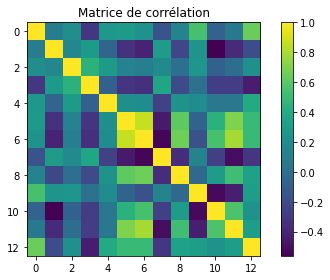

In [5]:
sigma = seq = [np.std(x) for x in Xt]
i_sigma = [1./s for s in sigma]
D_sigma = i_sigma * np.identity(p)
Z = np.matmul (Y, D_sigma)
R = np.matmul (np.matmul(D_sigma, V), D_sigma)
plt.imshow(R)
plt.title("Matrice de corrélation")
plt.tight_layout()
plt.colorbar();

##### Inertie du nuage de points
 $M$ est une matrice symétrique définie positive correspondant à la métrique
 
- Si $M=D^2_{1/\sigma}$ on calcule $ \frac{1}{n}\displaystyle\sum_{i=1}^n (e_i - g)^T M (e_i-g) = \frac{1}{n}\displaystyle\sum_{i=1}^n (y_i)^T M y_i = Tr(VM)$  

- Si $M=I$ on calcule $ \frac{1}{n}\displaystyle\sum_{i=1}^n (z_i)^T M z_i = Tr(RM)$

In [6]:
def calcul_inertie_somme (Y, M):
    inertie = 0
    for i in range(n):
        inertie += np.matmul(np.transpose(Y[i]), np.matmul(M, Y[i])) 
    return inertie / n
    
def calcul_inertie_trace (V, M):
    return np.trace (np.matmul (V, M))

# Si les données sont centrées mais pas encore réduites  on travaille avec Y et V
M = np.matmul(D_sigma, D_sigma)
print (calcul_inertie_somme(Y, M))
print (calcul_inertie_trace(V, M))

# Si les données sont centrées réduites, on travaille avec Z et R
M = np.identity(p)
print (calcul_inertie_somme(Z, M))
print (calcul_inertie_trace(R, M))

12.999999999999995
13.000000000000004
12.999999999999998
13.000000000000004


#### Analyse spectrale

In [7]:
eigenvalues,eigenvectors = np.linalg.eig(R)
eigenvalues = sorted(eigenvalues, reverse=True)
u = [eigenvectors[:,i] for i in range(p)]

##### Calcul des composantes principales

In [8]:
c = []
for j in range(p):
    c.append(np.matmul (Z, u[j]))

##### Pourcentage d'inertie expliquée par un axe
Pourcentage d'inertie cumulée expliquée par les $k$ premiers axes : $\frac{\displaystyle\sum_{j=1}^k\lambda_j}{\displaystyle\sum_{j=1}^p\lambda_j}$

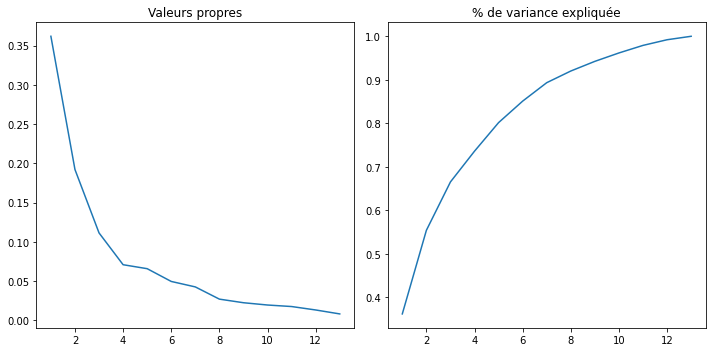

In [9]:
i_lambda = [l/p for l in eigenvalues]
i_cum = np.cumsum(eigenvalues)/p
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(np.arange(1,p+1),i_lambda)
plt.title('Valeurs propres')
plt.subplot(122)
plt.plot(np.arange(1,p+1),i_cum)
plt.title('% de variance expliquée');
plt.tight_layout()

##### Critère de Kaiser

In [10]:
nb_l = np.sum(np.array(eigenvalues)>1)
print ("On retient " + str(nb_l) + " axes")

On retient 3 axes


#### Analyse des résultats

##### Corrélation variables/facteurs

In [11]:
r = []
for j in range(p):
    r.append(np.sqrt(eigenvalues[j]) * u[j])

##### Cercle des corrélations pour un couple de composantes principales
Pour $c_1$ et $c_2$, chaque variable $x_j$ est repérée par un point d'abscisse $r(c_1,x^j)$ et d'ordonnée $r(c_2, x_j)$.

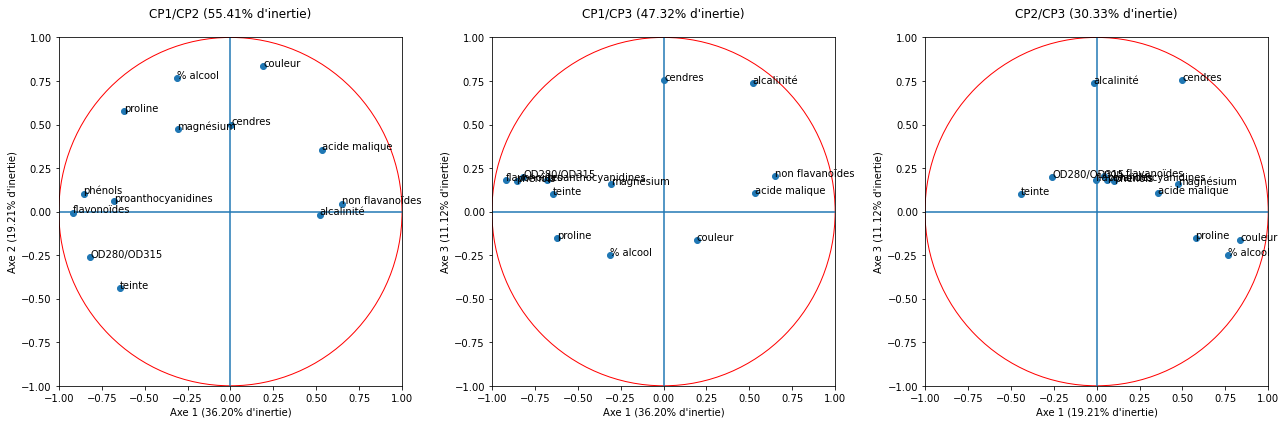

In [12]:
i1 = i_lambda[0] * 100
i2 = i_lambda[1] * 100
i3 = i_lambda[2] * 100
i12 = i1 + i2
i13 = i1 + i3
i23 = i2 + i3


plt.figure(figsize=(18, 6))
plt.subplot(131)
plt.title('CP1/CP2 (%.2f' % i12 + '% d\'inertie)\n')
plt.xlabel('Axe 1 (%.2f' % i1 + '% d\'inertie)')
plt.ylabel('Axe 2 (%.2f' % i2 + '% d\'inertie)')
plt.xlim([-1, 1])
plt.ylim([-1, 1])
plt.axhline(0)
plt.axvline(0)
plt.gca().add_patch(plt.Circle((0,0), radius= 1, facecolor='none', edgecolor='r'))
plt.scatter(r[0], r[1])
for i, txt in enumerate(variables):
    plt.annotate(txt, (r[0][i], r[1][i]))

plt.subplot(132)
plt.title('CP1/CP3 (%.2f' % i13 + '% d\'inertie)\n')
plt.xlabel('Axe 1 (%.2f' % i1 + '% d\'inertie)')
plt.ylabel('Axe 3 (%.2f' % i3 + '% d\'inertie)')
plt.xlim([-1, 1])
plt.ylim([-1, 1])
plt.axhline(0)
plt.axvline(0)
plt.gca().add_patch(plt.Circle((0,0), radius= 1, facecolor='none', edgecolor='r'))
plt.scatter(r[0], r[2])
for i, txt in enumerate(variables):
    plt.annotate(txt, (r[0][i], r[2][i]))
    
plt.subplot(133)
plt.title('CP2/CP3 (%.2f' % i23 + '% d\'inertie)\n')
plt.xlabel('Axe 1 (%.2f' % i2 + '% d\'inertie)')
plt.ylabel('Axe 3 (%.2f' % i3 + '% d\'inertie)')
plt.xlim([-1, 1])
plt.ylim([-1, 1])
plt.axhline(0)
plt.axvline(0)
plt.gca().add_patch(plt.Circle((0,0), radius= 1, facecolor='none', edgecolor='r'))
plt.scatter(r[1], r[2])
for i, txt in enumerate(variables):
    plt.annotate(txt, (r[1][i], r[2][i]))
plt.tight_layout()

##### Contribution des variables

In [13]:
contributions_variables = []
for i in range (p):
    line = []
    for j in range (p):
        line.append(np.transpose(u)[i][j]*np.transpose(u)[i][j])
    contributions_variables.append(line)
print (print_tab (p, p, variables, contributions_variables))

            	CP1	CP2	CP3	CP4	CP5	CP6	CP7	CP8	CP9	CP10	CP11	CP12	CP13 
  % alcool	0.02 	0.23 	0.04 	0.00 	0.07 	0.05 	0.00 	0.00 	0.16 	0.07 	0.26 	0.05 	0.04
  acide ma	0.06 	0.05 	0.01 	0.29 	0.00 	0.29 	0.18 	0.00 	0.00 	0.01 	0.01 	0.01 	0.10
   cendres	0.00 	0.10 	0.39 	0.05 	0.02 	0.02 	0.02 	0.02 	0.03 	0.00 	0.09 	0.25 	0.00
  alcalini	0.06 	0.00 	0.37 	0.00 	0.00 	0.01 	0.08 	0.01 	0.18 	0.00 	0.04 	0.23 	0.00
  magnésiu	0.02 	0.09 	0.02 	0.12 	0.53 	0.00 	0.10 	0.00 	0.02 	0.00 	0.07 	0.01 	0.00
   phénols	0.16 	0.00 	0.02 	0.04 	0.02 	0.01 	0.00 	0.22 	0.16 	0.09 	0.08 	0.09 	0.10
  flavonoï	0.18 	0.00 	0.02 	0.02 	0.01 	0.00 	0.00 	0.69 	0.04 	0.00 	0.00 	0.00 	0.03
  non flav	0.09 	0.00 	0.03 	0.04 	0.25 	0.07 	0.35 	0.01 	0.05 	0.00 	0.04 	0.01 	0.05
  proantho	0.10 	0.00 	0.02 	0.16 	0.02 	0.28 	0.14 	0.01 	0.14 	0.01 	0.04 	0.06 	0.02
   couleur	0.01 	0.28 	0.02 	0.00 	0.01 	0.18 	0.05 	0.00 	0.00 	0.37 	0.00 	0.00 	0.08
    teinte	0.09 	0.08 	0.01 	0.18 	0.03 	0.01 	0.0

##### Représentation des individus

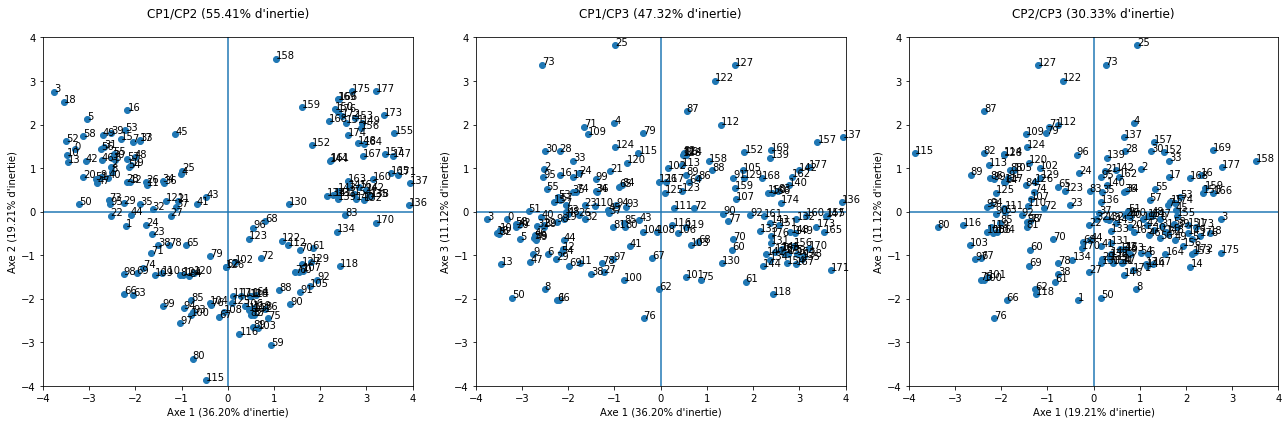

In [14]:
plt.figure(figsize=(18, 6))
plt.subplot(131)
plt.title('CP1/CP2 (%.2f' % i12 + '% d\'inertie)\n')
plt.xlabel('Axe 1 (%.2f' % i1 + '% d\'inertie)')
plt.ylabel('Axe 2 (%.2f' % i2 + '% d\'inertie)')
plt.xlim([-4, 4])
plt.ylim([-4, 4])
plt.axhline(0)
plt.axvline(0)
plt.scatter(c[0], c[1])
for i, txt in enumerate(ind):
    plt.annotate(txt, (c[0][i], c[1][i]))

plt.subplot(132)
plt.title('CP1/CP3 (%.2f' % i13 + '% d\'inertie)\n')
plt.xlabel('Axe 1 (%.2f' % i1 + '% d\'inertie)')
plt.ylabel('Axe 3 (%.2f' % i3 + '% d\'inertie)')
plt.xlim([-4, 4])
plt.ylim([-4, 4])
plt.axhline(0)
plt.axvline(0)
plt.scatter(c[0], c[2])
for i, txt in enumerate(ind):
    plt.annotate(txt, (c[0][i], c[2][i]))
    
plt.subplot(133)
plt.title('CP2/CP3 (%.2f' % i23 + '% d\'inertie)\n')
plt.xlabel('Axe 1 (%.2f' % i2 + '% d\'inertie)')
plt.ylabel('Axe 3 (%.2f' % i3 + '% d\'inertie)')
plt.xlim([-4, 4])
plt.ylim([-4, 4])
plt.axhline(0)
plt.axvline(0)
plt.scatter(c[1], c[2])
for i, txt in enumerate(ind):
    plt.annotate(txt, (c[1][i], c[2][i]))
plt.tight_layout()

##### Contribution des individus
$\frac{p_ic_{ki}^2}{\lambda_k}$

In [15]:
contributions_individus = []
for i in range (n):
    line = []
    for k in range (p):
        val = (np.transpose(c)[i][k]*np.transpose(c)[i][k]) / (n * eigenvalues[k]) 
        line.append(val)
    contributions_individus.append(line)
    
print (print_tab (n, p, ind, contributions_individus))

            	CP1	CP2	CP3	CP4	CP5	CP6	CP7	CP8	CP9	CP10	CP11	CP12	CP13 
         0	0.01 	0.00 	0.00 	0.00 	0.00 	0.00 	0.00 	0.00 	0.00 	0.01 	0.01 	0.01 	0.06
         1	0.01 	0.00 	0.02 	0.00 	0.00 	0.01 	0.00 	0.00 	0.02 	0.00 	0.00 	0.00 	0.00
         2	0.01 	0.00 	0.00 	0.00 	0.00 	0.00 	0.00 	0.00 	0.00 	0.00 	0.03 	0.00 	0.00
         3	0.02 	0.02 	0.00 	0.00 	0.00 	0.00 	0.00 	0.00 	0.01 	0.00 	0.00 	0.02 	0.00
         4	0.00 	0.00 	0.02 	0.00 	0.00 	0.00 	0.00 	0.00 	0.00 	0.00 	0.00 	0.01 	0.00
         5	0.01 	0.01 	0.00 	0.00 	0.00 	0.00 	0.00 	0.00 	0.00 	0.00 	0.00 	0.01 	0.00
         6	0.01 	0.00 	0.00 	0.00 	0.01 	0.00 	0.00 	0.00 	0.00 	0.00 	0.01 	0.01 	0.06
         7	0.01 	0.01 	0.00 	0.01 	0.00 	0.02 	0.00 	0.00 	0.00 	0.00 	0.00 	0.00 	0.03
         8	0.01 	0.00 	0.01 	0.00 	0.01 	0.00 	0.00 	0.00 	0.00 	0.01 	0.01 	0.01 	0.00
         9	0.01 	0.00 	0.00 	0.00 	0.00 	0.00 	0.01 	0.00 	0.00 	0.01 	0.00 	0.00 	0.00
        10	0.01 	0.00 	0.00 	0.00 	0.00 	0.00 	0.0

##### Tableau des cosinus carrés
$\frac{c_{ki}^2}{\displaystyle\sum_{j=1}^p c_{ji}^2}$

In [16]:
cosinus_carres = []
c = np.array(c)

for i in range(n):
    line = []
    # on prend la représentation de l'individu i sur chacune des composantes
    tot = np.sum([x*x for x in c[:,i]])
    for k in range(p):
        line.append(c[:,i][k]*c[:,i][k]/tot)
    cosinus_carres.append(line)

print (print_tab (n, p, ind, cosinus_carres))

            	CP1	CP2	CP3	CP4	CP5	CP6	CP7	CP8	CP9	CP10	CP11	CP12	CP13 
         0	0.69 	0.13 	0.00 	0.00 	0.03 	0.00 	0.02 	0.00 	0.00 	0.02 	0.03 	0.01 	0.07
         1	0.43 	0.01 	0.36 	0.01 	0.01 	0.08 	0.00 	0.00 	0.09 	0.01 	0.01 	0.00 	0.00
         2	0.57 	0.10 	0.09 	0.05 	0.01 	0.03 	0.02 	0.00 	0.01 	0.00 	0.13 	0.01 	0.00
         3	0.60 	0.32 	0.00 	0.01 	0.00 	0.00 	0.01 	0.01 	0.02 	0.00 	0.00 	0.02 	0.00
         4	0.14 	0.11 	0.58 	0.02 	0.01 	0.02 	0.03 	0.00 	0.02 	0.01 	0.02 	0.04 	0.00
         5	0.60 	0.29 	0.03 	0.02 	0.03 	0.00 	0.01 	0.00 	0.01 	0.01 	0.00 	0.01 	0.00
         6	0.52 	0.12 	0.08 	0.00 	0.09 	0.03 	0.00 	0.01 	0.01 	0.00 	0.02 	0.02 	0.09
         7	0.38 	0.23 	0.00 	0.13 	0.00 	0.18 	0.00 	0.00 	0.00 	0.01 	0.00 	0.01 	0.05
         8	0.51 	0.07 	0.25 	0.00 	0.06 	0.00 	0.00 	0.00 	0.02 	0.03 	0.03 	0.02 	0.00
         9	0.71 	0.06 	0.09 	0.01 	0.02 	0.00 	0.07 	0.00 	0.00 	0.03 	0.00 	0.00 	0.00
        10	0.73 	0.10 	0.01 	0.00 	0.01 	0.00 	0.0

## Analyse Factorielle des correspondances

On cherche à expliquer la liaison entre deux variables qualitatives $X$ et $Y$, caractérisées par un ensemble de couples de modalités $(x_i,y_i)$. On note $x_1\cdots x_J$ et $y_1\cdots y_K$ les modalités distinctes de $X$ et $Y$ respectivement. 

Plus précisément, l'analyse factorielle des correspondances (AFC) vise à définir un modèle statistique permettant de fournir des paramètres dont la représentation graphique illustre les correspondances entre les modalités de ces variables. Dans sa version "analyse de données", l'AFC cherche à réduire la dimension des données en effectuant la décomposition factorielle des nuages de points associés aux profils lignes et aux profils colonnes du tableau de contingence croisant les modalités des deux variables (L'AFC est une double ACP sur les deux tableaux de profils). On aborde à la fin du chapitre une modélisation statistique de l'AFC, en supposant que les fréquences d'observation correspondent à l'observation d'une probabilité théorique, dont la distribution modélise le tableau de contingence des deux variables.



### Notations
Le tableau de contingence ${\bf T}$ entre les $X$ et $Y$, vu comme une matrice,  est défini par 

|          | $y_1$    | $\cdots$ | $y_k$    | $\cdots$ | $y_K$    | total    |
|----------|----------|----------|----------|----------|----------|----------|
| $x_1$    | $n_{11}$ | $\cdots$ | $n_{1k}$ | $\cdots$ | $n_{1K}$ | $n_{1.}$ |
| $\vdots$ | $\vdots$ | $\vdots$ | $\vdots$ | $\vdots$ | $\vdots$ | $\vdots$ |
| $x_j$    | $n_{j1}$ | $\cdots$ | $n_{jk}$ | $\cdots$ | $n_{jK}$ | $n_{j.}$ |
| $\vdots$ | $\vdots$ | $\vdots$ | $\vdots$ | $\vdots$ | $\vdots$ | $\vdots$ |
| $x_J$    | $n_{J1}$ | $\cdots$ | $n_{Jk}$ | $\cdots$ | $n_{JK}$ | $n_{J.}$ |
| total    | $n_{.1}$ | $\cdots$ | $n_{.k}$ | $\cdots$ | $n_{.K}$ | $n$      |


où $n_{j.}$ (resp $n_{.k}$ )sont les effectifs marginaux représentant le nombre de fois où $x_j$ (resp. $y_k$) apparaît, et $n_{jk}$ le nombre d'apparitions du couple $(x_j,y_k)$.

Les fréquences conjointes $f_{jk}=\frac{n_{jk}}{n}$ et les fréquences marginales sont stockées dans des vecteurs ${\bf g_J}=\begin{pmatrix}f_{1.}\ldots f_{J.} \end{pmatrix}^T$ et ${\bf g_K}=\begin{pmatrix}f_{.1}\ldots f_{.K} \end{pmatrix}^T$.


On note aussi ${\bf D_J}=diag\left (f_{1.}\ldots f_{J.}\right )$ et ${\bf D_K}=diag\left (f_{.1}\ldots f_{.K} \right )$.

Dans le tableau de contingence $\mathbf T$, on lit le $j^e$ profil ligne $[\frac{n_{j1}}{n_{j.}}\ldots \frac{n_{jK}}{n_{j.}}]$, considéré comme un vecteur de $\mathbb{R}^K$ et le $k^e$ profil colonne $[\frac{n_{1k}}{n_{.k}}\ldots \frac{n_{Jk}}{n_{.k}}]$ considéré comme un vecteur de $\mathbb{R}^J$. Ces profils sont rangés dans des matrices de profils lignes ${\bf A}\in\mathcal{M}_{KJ}(\mathbb{R})$ et de colonnes ${\bf B}\in\mathcal{M}_{JK}(\mathbb{R})$ définies par ${\bf A}=\frac{1}{n}{\bf T^TD_J^{-1}}\textrm{  et  } {\bf B}=\frac{1}{n}{\bf T D_K^{-1}}$


### Double ACP
L'analyse factorielle des correspondances peut être considérée comme le résultat d'une double ACP : 

- une effectuée sur les profils colonnes dans $\mathbb{R}^J$
- une effectuée sur les profils lignes dans $\mathbb{R}^K$

relativement à la métrique du $\chi^2$ de matrice ${\bf D_K^{-1}}$ pour l'analyse en lignes et ${\bf D_J^{-1}}$ pour l'analyse en colonnes.

Ainsi, par exemple, la distance entre deux modalités $x_l$ et $x_p$ de $X$ est donnée par :

$\Vert {\bf A_{.l}}-{\bf A_{.p}}\Vert^2_{{\bf D_K^{-1}}} = \displaystyle\sum_{i=1}^K\frac{1}{f_{.i}}\left (A_{i,l}-A_{i,p} \right )^2$

où ${\bf A_{.l}}$ est la $l^e$ colonne de ${\bf A}$. La métrique du $\chi^2$ introduit les inverses
des fréquences marginales des modalités de $Y$ comme pondérations des écarts
entre éléments de deux profils relatifs à $X$ (et réciproquement). Elle attribue
donc plus de poids aux écarts correspondants à des modalités de faible effectif
(rares) pour $Y$.

#### ACP dans $\mathbb{R}^J$
L'ACP sur les profils colonnes est réalisée en recherchant les éléments propres de ${\bf BA}$, symétrique par rapport à la métrique ${\bf D_J^{-1}}$ et semi définie positive. On note $\bf U$ la matrice des vecteurs propres. Cette ACP fournit une représentation des modalités de $Y$, réalisée au moyen des lignes de la matrice des composantes principales ${\bf C_K}={\bf B^TD_J^{-1}U}$.

#### ACP dans $\mathbb{R}^K$
L'ACP sur les profils lignes est réalisée en recherchant les éléments propres de ${\bf AB}$, symétrique par rapport à la métrique ${\bf D_K^{-1}}$ et semi définie positive. On note $\bf V$ la matrice des vecteurs propres. Cette ACP fournit une représentation des modalités de $X$, réalisée au moyen des lignes de la matrice des composantes principales ${\bf C_J}={\bf A^TD_K^{-1}V}$.

Puisque $\bf U$ contient les vecteurs propres de ${\bf BA}$ et $\bf V$ ceux de ${\bf AB}$, il suffit de réaliser en fait une seule ACP, les résultats de l'autre s'en déduisant simplement : si $\bf \Lambda$ est la matrice des valeurs propres (hors $\lambda_0=0$) communes aux deux ACP :

${\bf V} ={\bf AU\Lambda^{-\frac{1}{2}}}\textrm {  et  } {\bf U} ={\bf BV\Lambda^{-\frac{1}{2}}}$
Alors 

${\bf C_K}={\bf B^TD_J^{-1}U }= {\bf B^TD_J^{-1}BV\Lambda^{-\frac{1}{2}}} = {\bf D_K^{-1}ABV \Lambda^{-\frac{1}{2}}} =  {\bf D_K^{-1}V \Lambda^{\frac{1}{2}}}$
et

${\bf C_J}={\bf A^TD_K^{-1}V}= {\bf D_J^{-1}U \Lambda^{\frac{1}{2}}}$
d'où 

${\bf C_K}={\bf B^TC_J\Lambda^{-\frac{1}{2}}} \textrm{    et    } {\bf C_J}={\bf A^TC_K\Lambda^{-\frac{1}{2}}}$

```{prf:remark}
:class: dropdown
Soit deux matrices ${\bf A}\in\mathcal{M}_{KJ}(\mathbb{R)}$  et ${\bf B}\in\mathcal{M}_{JK}(\mathbb{R})$. Les valeurs propres non nulles de ${\bf AB}$ et ${\bf BA}$ sont identiques avec le même degré de multiplicité. De plus, si $\bf u$ est vecteur propre de ${\bf BA}$ associé à la valeur propre $\lambda\neq 0$, alors ${\bf v} = {\bf Au} $ est vecteur propre de ${\bf AB}$ associé à la même valeur
propre.
``` 

### Représentation graphique
La décomposition de $\mathbf T/n$ donne :

$\frac{f_{jk}-f_{j.}f_{.k}}{f_{j.}f_{.k}} = \displaystyle\sum_{i=0}^{min(J-1,K-1)}\sqrt{\lambda_i}\frac{u^i_jv^i_k}{f_{j.}f_{.k}}$
Cette quantité est appelée taux de liaison entre les modalités $j$ et $k$. En se limitant au rang $q$ on obtient pour chaque couple de modalité $(j,k)$ de $\mathbf T$ une approximation de son écart relatif à l'indépendance, comme produit scalaire des deux vecteurs $\frac{(\lambda_i)^{\frac{1}{4}}}{f_{j.}}u_j$ et $\frac{(\lambda_i)^{\frac{1}{4}}}{f_{.k}}v_k$, termes génériques des matrices ${\bf D_J^{-1}U\Lambda^{\frac{1}{4}}}$ et ${\bf D_K^{-1}V\Lambda^{\frac{1}{4}}}$

La représentation graphique de ces vecteurs (par exemple avec $q=2$), appelée biplot, donne la correspondance entre les deux modalités $x_j$ et $y_k$. Lorsque ces deux modalités, éloignées de l'origine, sont
voisines (resp. opposées), leur produit scalaire est de valeur absolue importante ; leur cellule conjointe contribue alors fortement et de manière positive
(resp. négative) à la dépendance entre les deux variables. L'analyse factorielle des correspondances apparaît ainsi comme la meilleure reconstitution des fréquences $f_{jk}$, ou encore la meilleure représentation des écarts relatifs à l'indépendance. 

### Interprétation
Les qualités de représentation dans la dimension choisie et les contributions
des modalités de $X$ ou de $Y$ se déduisent facilement de celles de l'ACP. Ces
quantités sont utilisées à la fois pour choisir la dimension de l'analyse factorielle des correspondances  et pour interpréter ses résultats dans la dimension choisie.

#### Inertie et test d'indépendance
En analyse en composantes principales centrée réduite, l'inertie totale du nuage de points est  égale au nombre de variables. En AFC,  l'inertie totale du nuage des profils lignes est  égale à l'inertie totale du nuage des profils colonnes, égale au $\chi^2$ d'indépendance entre les deux variables qualitatives.  
La valeur de l'inertie est donc un indicateur de la dispersion des nuages de points et une mesure de liaison entre les deux variables qualitatives,  appelée mesure d'écart à l'indépendance. 


#### Interprétation des valeurs propres
Les valeurs propres des ACP renseignent sur la dispersion des nuages de profils lignes et colonnes : 
- Une valeur propre proche de 1 indique une dichotomie parfaite du tableau $\mathbf T$, qui peut être décomposé après reclassement des modalités en deux blocs distincts
- Plus généralement $p$ valeurs propres proches amènent à $k+1$ blocs distincts
- Si toutes les valeurs propres sont proches de 1, on aboutit à l'effet Guttman : il existe une correspondance entre chaque modalité ligne et une modalité colonne "associée". Avec une réorganisation des modalités, les effectifs importants se trouvent alors le long de la diagonale.



#### Qualité globale
A $q$ fixé, la qualité globale de la représentation se mesure comme dans le cadre de l'ACP, comme le rapport entre les $q$ premières valeurs propres $\lambda_i$ et la somme sur tout le spectre. 

On montre que la qualité de la représentation dans la $i^e$ dimension s'écrit $\frac{n\lambda_i}{\chi^2}$

#### Qualité de chaque modalité
Comme dans l'ACP également, la qualité d'une modalité de $X$ (resp. $Y$) se quantifie par le carré du cosinus de l'angle entre le vecteur représentant cette modalité dans $\mathbb{R}^K$ (resp. $\mathbb{R}^J$)  et sa projection orthogonale au sens de ${\bf D_K^{-1}}$ (resp. ${\bf D_J^{-1}}$) dans le sous-espace principal de dimension $q$. Ces cosinus se calculent très simplement en faisant le rapport des sommes appropriées des carrés des coordonnées extraites des lignes de ${\bf C_J}$ (resp. ${\bf C_K}$).

#### Inertie expliquée
L'inertie totale du nuage des profils lignes (resp. colonnes) est égale à la somme de toutes les valeurs propres $\lambda_i$. La part due au $j^e$ profil ligne (resp. $k^e$ profil colonne) est $f_{j.}\displaystyle\sum_i \left (\mathbf{C_J}(ji) \right )^2$ (resp. $f_{.k}\displaystyle\sum_i \left (\mathbf{C_K}(ik) \right )^2$).

Les contributions à l'inertie selon chaque axe se calculent de la même manière, sans sommation sur $i$. Elles sont utilisées pour sélectionner les modalités les plus importantes (i.e. celles qui importent le plus dans la définition de la liaison entre $X$ et $Y$).

#### Choix de q
Comme dans le cas de l'ACP, le choix de l'espace de représentation est important. On peut estimer $q$ comme en ACP (pourcentage de l'inertie expliquée, décroissance des valeurs propres), ou utiliser une approche probabiliste : si

$\nu_{jk}^q = n f_{j.}f_{.k} + n\displaystyle\sum_{i=1}^q \sqrt{\lambda_i} u^i_jv^i_k$
est l'estimation d'ordre $q$ de $n_{jk}$ alors sous certaines conditions ($n$ grand, modèle multinomial...), on montre que 

$\displaystyle\sum_{j=1}^J\displaystyle\sum_{k=1}^K\frac{\left (n_{jk}-\nu_{jk}^q \right )^2}{\nu_{jk}^q}\approx \displaystyle\sum_{i\geq q+1} \lambda_i$

suit approximativement une loi $\chi^2$ à $(J-q-1)(K-q-1)$ degrés de liberté. On peut donc retenir $q$ comme étant la plus petite dimension telle que cette quantité est inférieure à la valeur limite de cette loi. 

### Modèle statistique
On suppose que chaque fréquence $f_{jk}$ correspond à l'observation d'une probabilité   théorique $\pi_{jk}$ et on modélise donc $\bf T$ par la distribution correspondante. Le modèle décrivant cette distribution permet d'expliciter la probabilité.
#### Modèle log linéaire
Souvent, le nombre $n$ est fixé a priori. La distribution conjointe des effectifs $n_{jk}$ est alors conditionnée par $n$ et est une loi multinomiale de paramètre $\pi_{jk}$ et d'espérance $n\pi_{jk}$.

Par définition, les variables $X$ et $Y$ sont indépendantes si $\pi_{jk}=\pi_{j.}\pi_{.k}$. Dans le cas contraire, on peut écrire 

$\pi_{jk} = \pi_{j.}\pi_{.k}\frac{\pi_{jk}}{\pi_{j.}\pi_{.k}}$

En passant au log, on linéarise en 

$ln\left (\pi_{jk}\right ) =  ln (\pi_{j.}) + ln (\pi_{.k})  + ln \left( \frac{\pi_{jk}}{\pi_{j.}\pi_{.k}}\right )$

Ce modèle est saturé car il comporte autant de paramètres que de données.  L'indépendance est vérifiée si le dernier terme de couplage est nul pour tout $(j,k)$. Les paramètres du modèle sont estimés en maximisant la log vraisemblance.


#### Modèle de corrélation
Dans ce modèle, on écrit

$\pi_{jk} = \pi_{j.}\pi_{.k} + \displaystyle\sum_{i=1}^q \sqrt{\lambda_i} u^i_jv^i_k$

où ${\bf u^i}$ (resp. ${\bf v^i}$) sont les vecteurs propres de ${\bf BA}$ (resp. ${\bf AB}$),  $\lambda_i$ les valeurs propres associées (qui sont identiques pour les deux matrices), et $q\leq min(J-1,K-1)$. 

Les contraintes $\displaystyle\sum_{j=1}^J u^i_j =  \displaystyle\sum_{k=1}^K v^i_k = 0$  et ${\bf (u^i)^TD_J^{-1} u^l }= {\bf (v^i)^TD_K^{-1} v^l} = \delta_{il}$ (vecteurs propres orthonormés) permettent d'identifier les paramètres du modèle. \\
Les estimations des paramètres $\pi_{j.}\pi_{.k} ,\lambda_i,u^i,v^i$ peuvent être réalisées par maximum de vraisemblance ou par moindres carrés.

### Exemple
On utilise ici des données open source du [gouvernement](https://www.data.gouv.fr/fr/posts/les-donnees-des-elections/), présentant le résultat du premier tour des élections présidentielles de 2017.



|    | Region              | HAMON  | MACRON  | ASSELINEAU | FILLON  | CHEMINADE |
|----|---------------------|--------|---------|------------|---------|-----------|
| 0  | Grand-Est           | 151296 | 615775  | 30223      | 586390  | 6078      |
| 1  | Nelle-Aquitaine     | 240175 | 851372  | 26667      | 602884  | 6264      |
| 2  | AURA                | 256620 | 1026255 | 41352      | 846252  | 7602      |
| 3  | Bourgogne-FC        | 87382  | 338187  | 14330      | 304387  | 2842      |
| 4  | Bretagne            | 180827 | 581076  | 13419      | 380815  | 3400      |
| 5  | Centre-Val-de-Loire | 83552  | 323724  | 12075      | 300324  | 2882      |
| 6  | Corse               | 5780   | 28528   | 965        | 39453   | 253       |
| 7  | Ile-de-France       | 430404 | 1612816 | 64406      | 1249770 | 9796      |
| 8  | Occitanie           | 216362 | 740037  | 28603      | 566045  | 5524      |
| 9  | Hauts-de-France     | 166640 | 630300  | 26043      | 521389  | 5688      |
| 10 | Normandie           | 113744 | 423075  | 14303      | 370188  | 3544      |
| 11 | Pays-de-la-Loire    | 143491 | 575832  | 15529      | 516428  | 3731      |
| 12 | PACA                | 113344 | 520909  | 25948      | 615455  | 4569      |
| 13 | Outremer            | 101948 | 389440  | 18725      | 314017  | 3425      |


|    | Region              | MELENCHON | LASSALLE | FILLON  | DUPONT-AIGNAN | POUTOU | LEPEN   | ARTHAUD |
|----|---------------------|-----------|----------|---------|---------------|--------|---------|---------|
| 0  | Grand-Est           | 484810    | 30508    | 586390  | 182200        | 34468  | 825600  | 24272   |
| 1  | Nelle-Aquitaine     | 703505    | 91915    | 602884  | 155600        | 49649  | 640228  | 21442   |
| 2  | AURA                | 805846    | 53282    | 846252  | 215951        | 43530  | 867874  | 24670   |
| 3  | Bourgogne-FC        | 276954    | 15843    | 304387  | 87263         | 18529  | 387658  | 11492   |
| 4  | Bretagne            | 385736    | 19097    | 380815  | 87928         | 27092  | 306644  | 14296   |
| 5  | Centre-Val-de-Loire | 252307    | 13570    | 300324  | 82060         | 16282  | 329470  | 11365   |
| 6  | Corse               | 21314     | 8711     | 39453   | 4462          | 1374   | 43041   | 495     |
| 7  | Ile-de-France       | 1225311   | 36358    | 1249770 | 226266        | 45715  | 708340  | 23592   |
| 8  | Occitanie           | 734223    | 75483    | 566045  | 135405        | 35219  | 762104  | 16777   |
| 9  | Hauts-de-France     | 633322    | 22411    | 521389  | 160722        | 33653  | 1003221 | 29194   |
| 10 | Normandie           | 362535    | 13900    | 370188  | 98957         | 23816  | 452702  | 15196   |
| 11 | Pays-de-la-Loire    | 403454    | 16988    | 516428  | 109842        | 26340  | 364267  | 16018   |
| 12 | PACA                | 515419    | 29551    | 615455  | 119025        | 21316  | 774791  | 10439   |
| 13 | Outremer            | 256149    | 7748     | 314017  | 29505         | 17599  | 213553  | 13180   |



On décide dans l'analyse d'enlever le candidat LASSALLE, dont les votes sont concentrés dans les Pyrenées et en Corse (et qui introduit un biais dans l'étude).

A partir de ce tableau de données $\bf T$, on calcule les tableaux de fréquences en lignes et en colonnes, ainsi que les profils ligne et colonne moyens. 
Comme en ACP, on s'intéresse à l'inertie du nuage de points, mais pour ce faire on utilise la distance du $\chi^2$. Avec cette métrique, la distance entre deux lignes (ou deux colonnes) ne dépend pas des poids respectifs des colonnes (ou lignes). Par exemple, les différents candidats obtiennent des scores très différents et l'usage de la métrique euclidienne aurait donné trop de poids aux candidats qui ont obtenu des scores élevés. De plus, la métrique du $\chi^2$ possède la propriété d'équivalence distributionnelle : si on regroupe deux modalités lignes (colonnes), les distances entre les profils-colonne (lignes), ou entre les autres profils-lignes (colonnes) restent inchangées.



![](./images/presdist.png)

On peut également calculer les taux de liaisons, définis pour deux individus $j$ et $k$ par $\frac{f_{jk}-f_{j.}f_{.k}}{f_{j.}f_{.k}}$. Par exemple, le taux de liaison entre HAMON et Grand-Est est égal à  -0.2003, tandis que le taux de liaison entre CHEMINADE et Nouvelle-Aquitaine est égal à 0.2068. Le taux de liaison s'interpréte comme suit : le score du candidat dans la région est 20\% moins élevé (ou 20.6\% moins élevé) que le score théorique que l'on observerait si les votes étaient indépendants des régions.

Notons que $f_{j.}f_{.k}$ représente le poids théorique de chaque case du tableau des fréquences. La somme de ces coefficients vaut 1. La moyenne de la série des taux de liaisons pondérée par les $f_{j.}f_{.k}$ est nulle. De même, la variance de cette série avec la même pondération vaut $\chi^2$, et ici est égale à 0.0301.

On réalise ensuite une AFC, par analyse spectrale des matrices $\bf X^T\bf X$ et $\bf X\bf X^T$, où $\bf X$ est la matrice de terme général $f_{jk}/\sqrt{f_{j.}f_{.k}}$.  

Le nombre de valeurs propres produites par la recherche des facteurs principaux est égal au minimum du nombre de lignes et du nombre de colonnes du tableau de contingence. La première valeur propre est systématiquement égale à 1, et n'est pas utilisée dans les résultats. Les autres valeurs propres sont des nombres positifs inférieurs à 1 et leur somme est égale à $\chi^2$.



![](./images/spectralelig.png) ![](./images/spectralecol.png)


On utilise alors les vecteurs propres (axes factoriels) pour analyser les données lignes et colonnes. Pour chaque analyse, on reporte (illustré ici sur l'analyse en lignes) : 
- La masse, qui rappelle les fréquences marginales des lignes c'est-à-dire le profil colonne moyen. Contrairement à l'ACP normée, dans laquelle chaque individu était affecté du même poids, les régions ont ici un poids dépendant de l'effectif total d'électeurs inscrits dans la région.
- La qualité qui indique les qualités de représentation des individus ligne sur les deux premiers axes factoriels : c'est la somme des carrés des composantes de chaque individu sur les 2 axes, normalisée par la somme des carrés des composantes sur tous les axes.
- La contribution de chaque individu à la formation de chaque axe factoriel


|    | Region              | Masse    | Coord1    | Coord2    | Qualité  | contrib1 | contrib2 |
|----|---------------------|----------|-----------|-----------|----------|----------|----------|
| 0  | Grand-Est           | 0.082561 | -0.081478 | 0.030469  | 0.033810 | 0.1031   | 0.05     |
| 1  | Nelle-Aquitaine     | 0.092573 | 0.022322  | -0.009848 | 0.002607 | 0.0129   | 0.1404   |
| 2  | AURA                | 0.116102 | 0.002463  | 0.020096  | 0.000032 | 0.0005   | 0.0074   |
| 3  | Bourgogne-FC        | 0.042922 | -0.049796 | 0.021913  | 0.012884 | 0.0203   | 0.0048   |
| 4  | Bretagne            | 0.055616 | 0.074398  | -0.000143 | 0.028325 | 0.0727   | 0.00599  |
| 5  | Centre-Val-de-Loire | 0.039694 | -0.027564 | 0.034140  | 0.003982 | 0.0057   | 0.026    |
| 6  | Corse               | 0.004089 | -0.089963 | 0.097463  | 0.036278 | 0.0061   | 0.0528   |
| 7  | Ile-de-France       | 0.157099 | 0.099907  | 0.022705  | 0.048773 | 0.3461   | 0.0099   |
| 8  | Occitanie           | 0.090960 | -0.024738 | -0.020736 | 0.003126 | 0.0066   | 0.2115   |
| 9  | Hauts-de-France     | 0.090114 | -0.113101 | -0.015944 | 0.061802 | 0.2215   | 0.1268   |
| 10 | Normandie           | 0.052720 | -0.035129 | 0.014011  | 0.006437 | 0.0116   | 0.0004   |
| 11 | Pays-de-la-Loire    | 0.061053 | 0.049348  | 0.050417  | 0.012418 | 0.0311   | 0.1115   |
| 12 | PACA                | 0.076388 | -0.085523 | 0.044826  | 0.035070 | 0.1061   | 0.1766   |
| 13 | Outremer            | 0.038108 | 0.073346  | 0.038647  | 0.026537 | 0.051    | 0.0222   |


On représente alors graphiquement les individus ligne et colonne sur le premier plan factoriel.

![](./images/planlig.png)![](./images/plancol.png)


On en déduit alors l'analyse suivante (ici proposée sur les candidats) :
- Premier axe : Le Pen représente 67\% de l'inertie de cet axe. Macron, à l'opposé en représente 19\%. Clairement, cet axe oppose Le Pen à Macron, mais les autres candidats "les plus importants" ont un score du même signe que celui de Macron.
- Fillon représente 63\% de son inertie et s'oppose à Hamon, Poutou et Mélenchon. Macron et Le Pen sont insignifiants sur cet axe. Cet axe représente l'opposition classique droite / gauche.
- Le Pen est placée assez loin de l'origine sur la représentation graphique:  l'inertie de la modalité Le Pen (54\%) est bien plus importante que sa masse (21\%). Dit autrement, les scores de Le Pen présentent une grande variabilité selon les régions, plus élevée que celle des scores de Macron (inertie 16\% pour une masse de 24,3\%) ou encore Mélenchon (inertie 5\%, inertie 19,8\%). Les électeurs de Le Pen, même s'ils sont plus nombreux que lors des scrutins précédents, restent inégalement répartis sur le territoire.
- Enfin, la première source de variation dans les votes est une opposition Le Pen / Macron, indépendante des oppositions  droite / gauche traditionnels.



## Analyse des correspondances multiples

Tandis que l'analyse factorielle des correspondances permet d'expliquer la liaison entre deux variables qualitatives, l'analyse des correspondances multiples (ACM) s'intéresse au cas où l'on dispose de $p\geq 2$ variables. C'est l'équivalent de l'ACP pour les variables qualitatives.

### Notations
On dispose d'un tableau de données $\mathbf{H}=(h_{i,j})$ à $n$ lignes et $p$ colonnes, où $n$ est le nombre d'individus, $p$ le nombre de variables qualitatives mesurées et pour $i\in[\![1,n]\!],j\in[\![1,p]\!],h_{ij}\in\mathcal{M}_j$, $\mathcal{M}_j$ étant l'ensemble des modalités de la j$^e$ variable. Si $m_j$ est le cardinal de $\mathcal{M}_j$, alors $m=\sum_{k=1}^p m_k$ est le nombre total de modalités. 

````{prf:definition} Tableau disjonctif complet
Le tableau disjonctif complet $\mathbf T$ des données est un tableau $n\times m$ tel que 

$(\forall i\in[\![1,n]\!],j\in[\![1, m]\!])\; \mathbf T_{ij} = \left \{ \begin{array}{cl} 1&\textrm{si l'individu i possède la modalité j}\\0 & \textrm{sinon}\end{array}\right .$
````

On déduit de ce tableau disjonctif le tableau de Burt correspondant, $\mathbf B=\mathbf T^T \mathbf T$, qui rassemble les croisements deux à  deux de toutes les variables, i.e tous les tableaux de contingence des variables deux à deux. Sur la diagonale de $\mathbf B$ se trouvent les coefficients $B_{ii}=n_i$, donnant le nombre d'individus possédant la modalité $i$.  Les autres coefficients $B_{ij} = \mathbf{T_{\bullet i}}^T \mathbf {T_{\bullet j}}$ quantifient le nombre d'individus ayant les modalités $i$ et $j$.

### Analyse
#### Tableau de contingence de l'ACM
En analyse des correspondances multiples, on traite $\mathbf T$ comme un tableau de contingence. Les totaux en ligne sont alors égaux au nombre de variables $p$, les totaux en colonne correspondent au nombre d'individus ayant la modalité correspondant à la colonne traitée. Pour une colonne $j$, on note ce total $n_j$ Le total de tous les coefficients de $\mathbf T$ vaut donc $np$.

Comme dans le cas de l'AFC, l'ACM considère les fréquences, les profils ligne et les profils colonne.

Pour les fréquences : 

- $f_{ij}=T_{ij}/np$ est la fréquence conjointe et vaut donc $1/np$ si l'individu $i$ possède la modalité $j$ et 0 sinon. On range ces coefficients dans une matrice $\mathbf{F}\in\mathcal{M}_{nm}(\mathbb{R})$
- le poids des lignes est constant et vaut $1/n$. On note alors $\mathbf{a} = (\frac{1}{n}\cdots \frac{1}{n})^T\in\mathbb{R}^n$ le vecteur des poids des individus.
- le poids des colonnes vaut $n_j/np$, et est d'autant plus fort que la modalité $j$ est fréquente. On note alors $\mathbf{b} = (\frac{n_1}{np}\cdots \frac{n_m}{np})^T\in\mathbb{R}^m$ le vecteur des poids des modalités.


Comme en analyse factorielle des correspondances, on note ${\bf D_n}=diag\left ({\bf a}\right )$ et ${\bf D_m}=diag\left ({\bf b} \right )$.

Pour les profils ligne et colonne : 

- on lit dans $\mathbf T$ le i$^e$ profil ligne, considéré comme un vecteur de $\mathbb{R}^m$, de composantes $T_{ij}/p,j\in[\![1,m]\!]$. Ces profils sont rangés dans une matrice ${\bf A}\in\mathcal{M}_{nm}(\mathbb{R})$ et on a ${\bf A}={\bf D_n^{-1}F}$.
- on lit dans $\mathbf T$ le j$^e$ profil colonne, considéré comme un vecteur de $\mathbb{R}^n$, de composantes $T_{ij}/n_j,i\in[\![1,n]\!]$. Ces profils sont rangés dans ${\bf B}\in\mathcal{M}_{nm}(\mathbb{R})$ et on a ${\bf B}={\bf FD_m^{-1}}$.


L'ACM considère, comme l'AFC, deux nuages de points centrés :
1. le nuage des $n$ individus dans $\mathbb{R}^m$, i.e. les $n$ lignes de la matrice ${\bf D_n^{-1}(F-ab^T})$. Chaque individu est pondéré par $1/n$
2. le nuage des $m$ modalités dans $\mathbb{R}^n$, i.e. les $n$ lignes de la matrice ${\bf (F-ab^T)D_m^{-1}}$. Chaque modalité $j$ est pondérée par $n_j/np$.


#### Distances entre individus et entre modalités
En analyse des correspondances multiples, on utilise la distance du $\chi^2$ dans $\mathbb{R}^m$ et $\mathbb{R}^n$ : 


- dans l'espace des individus, la métrique est $\mathbf {D_m}^{-1}$ : 

$\chi^2(i,i') = (\mathbf{A}_{i\bullet}-\mathbf{A}_{i'\bullet})^T\mathbf {D_m}^{-1} (\mathbf{A}_{i\bullet}-\mathbf{A}_{i'\bullet}) = \displaystyle\sum_{j=1}^m\frac{1}{f_{\bullet j}}\left (\frac{T_{ij}-T_{i'j}}{p} \right )^2 = \frac {n}{p}\displaystyle\sum_{j=1}^m\frac{1}{{n_j}}\left (T_{ij}-T_{i'j}\right )^2$
Deux individus sont proches s'ils possèdent les mêmes modalités, sachant que l'on donne plus de poids au fait que ces deux individus ont en commun une modalité rare ($n_s$ petit).
- dans l'espace des modalités, la métrique est $\mathbf {D_n}^{-1}$ : 

$\chi^2(j,j') = (\mathbf{B}_{\bullet j}-\mathbf{B}_{\bullet j'})^T\mathbf {D_n}^{-1} (\mathbf{B}_{\bullet j}-\mathbf{B}_{\bullet j'}) = n\displaystyle\sum_{i=1}^n\left (\frac{T_{ij}}{n_j} -\frac{T_{ij'}}{n_{j'}}\right )^2$
et deux modalités sont proches si elles sont possédées par les mêmes individus. 


```{prf:remark}
:class: dropdown
On a de plus  $\chi^2(j,\mathbf{a}) = \frac{n}{n_j}-1$ et  $f_{\bullet j}\chi^2(j,\mathbf{a}) = \frac{1}{p}\left( 1-\frac{n_j}{n}\right )$. Donc la distance d'une modalité au centre du nuage est d'autant plus grande que la modalité est rare et la part de l'inertie totale, due à une modalité est d'autant plus grande que la modalité est rare.  On  évite donc en pratique de conserver dans l'analyse les modalités trop rares. 

De même, puisque $\displaystyle\sum_{k\in \mathcal{M}_j}f_{\bullet k}\chi^2(k,\mathbf{a}) = \frac{1}{p}\left( m_j-1\right )$, la part de l'inertie totale, due à une variable  $j$ est d'autant plus grande que le nombre de modalités  de cette variable est grand. Là aussi, on  évite en pratique de conserver dans l'analyse des variables ayant des nombres de modalités trop différents.
```


#### Principe de l'ACM
L'analyse en composantes multiples consiste alors à appliquer l'analyse factorielle des correspondances  du tableau des  contingences $\mathbf T$, c'est-à-dire effectuer une ACP pondérée des nuages des point-individus et des point-modalités .

Une différence notable vient cependant de l'interprétation de l'inertie de ces nuages de points  individus ($I(\mathbf{A})$) et modalités ($I(\mathbf{B})$). En AFC, on pouvait interpréter statistiquement cette inertie en terme de $\chi^2/n$ mesurant l'indépendance entre les deux variables qualitatives. Ici, ce n'est plus le cas puisque l'on peut montrer que $I(\mathbf{A}) = I(\mathbf{B})= m/p-1$. L'inertie dépend donc du nombre moyen $m/p$ de catégories par variable.




```{prf:remark}
:class: dropdown
Les anglo-saxons considère que l'ACM consiste à effectuer l'analyse factorielle des correspondances  du tableau de Burt $\mathbf T^T \mathbf T$, matrice symétrique de taille $m$. Les profils ligne et colonne sont alors identiques et correspondent aux modalités que l'on veut analyser. On ne peut donc pas effectuer d'analyse des individus.
```



### Interprétation des résultats
#### Inertie expliquée
L'inertie totale, égale comme nous l'avons vu à $m/p-1$ se calcule  également comme la somme des valeurs propres $\lambda_1+\cdots +\lambda_r$, où $r=min(n-1,m-p)$ est le nombre de valeurs propres non nulles issues de l'ACP. La part d'inertie expliquée par l'axe $z$ est alors $\lambda_z/(\lambda_1+\cdots +\lambda_r)$. En revanche, point important, le nombre d'axes retenus pour l'interprétation ou le recodage ne peut pas être choisi à partir de ces pourcentages d'inertie expliquées, contrairement à l'ACP.

#### Contributions et représentation
En reprenant les résultats de l'AFC, on montre que :

- les individus les plus excentrés sur les plans factoriels sont ceux qui contribuent le plus
- les modalités les plus excentrées ne sont pas nécessairement celles qui
contribuent le plus. En effet, leur contribution dépend de leur fréquence.
- la contribution d'une variable qualitative $j$ à un axe $z$ donne une idée de la liaison entre cette variable et la composante principale correspondant à $z$
- une représentation graphique consiste alors à représenter les variables qualitatives sur un plan factoriel $(z,z')$ : on propose en abscisses (respectivement ordonnées) les contributions des variables à l'axe $z$ (resp. $z'$)
- on évalue la qualité de la représentation de la même manière qu'en ACP, à l'aide des cosinus carrés. Si deux individus sont bien projetés alors s'ils sont proches en projections, ils sont effectivement proches dans leur espace d'origine et on peut alors interpréter leur proximité :
deux individus se ressemblent (au sens de la distance du $\chi^2$) s'ils ont choisis les mêmes modalités et ; deux modalités se ressemblent (en terme de $\chi^2$) si elles sont possédées par les mêmes individus. 


### Cas particulier $p$=2

Dans le cas $p=2$, on observe $2$ variables ayant respectivement $m_1$ et $m_2$ modalités. On se retrouve donc dans le cas où l'AFC s'applique et on peut :

- soit analyser le tableau $\mathbf{T}\in\mathcal{M}_{n,m_1+m_2}(\mathbb{R})$ par analyse en composantes multiples,
- soit analyser le tableau de contingence $\mathbf{K}\in\mathcal{M}_{m_1,m_2}(\mathbb{R})$ par AFC.


Si on note $Sp(\mathbf{K}) = (\mu_i)$ et $Sp(\mathbf{T}) = (\lambda_i)$ alors on montre  que  $\mu_r = (2\lambda_r - 1)^2$
On en déduit qu'à chaque valeur  propre de l'AFC correspondent deux valeurs propres de l'ACM $\lambda_r = \frac{1\pm \sqrt{\mu_r}}{2}$, et une relation entre les coordonnées factorielles des deux analyses 

$\begin{eqnarray*}
\mathbf{c}_1 = \begin{pmatrix} \mathbf{x_K}\\\mathbf{y_K}\end{pmatrix}\ &\textrm{pour}& \lambda_r = \frac{1+ \sqrt{\mu_r}}{2}\\
\mathbf{c}_2 = \begin{pmatrix} \mathbf{x_K}\\-\mathbf{y_K}\end{pmatrix}\ &\textrm{pour}& \lambda_r = \frac{1- \sqrt{\mu_r}}{2}
\end{eqnarray*}$

où $\mathbf{x_K},\mathbf{y_K}$ sont les composantes principales des profils ligne et colonne de $K$.
De là viennent deux constats :
- dans l'analyse en composantes multiples de 2 variables, on ne retient que les valeurs propres supérieures strictement à 1/2, les composantes correspondant  aux valeurs propres inférieures se déduisant facilement
- Les pourcentages d'inertie expliqués par les axes en ACM sont souvent très faibles et
ne peuvent donc pas être interprétés comme en AFC et en ACP.


### Exemple
On souhaite évaluer l'effet de l'espèce de chêne sur des vins rouges vieillis en barrique. Un même vin a été vieilli dans six barriques différentes fabriquées avec deux types de chêne : les vins $V_1$, $V_5$ et $V_6$ ont été élevés avec le premier type de chêne, tandis que les vins $V_2$, $V_3$ et $V_4$ ont été élevés avec le second. Trois experts $E_1,E_2,E_3$ ont ensuite choisi entre deux et cinq variables pour décrire les vins. Pour chaque vin et pour chaque variable, l'expert évalue l'intensité, codée soit comme une réponse binaire (i.e. fruité vs. non fruité), soit comme une réponse ternaire (i.e. pas fruité, un peu fruité, très fruité). On code le tout par un tableau disjonctif complet :


![](./images/tab0.png)

L'objectif de l'étude est d'une part de proposer une typologie des vins et d'autre part de savoir s'il y a un accord entre les échelles utilisées par les experts. 


La figure suivante présente le résultat de l'analyse spectrale en lignes. Les tableaux qui suivent donnent les coordonnées des individus ($S$), la qualité de leur représentation et leur contribution  (C$\times 10^3$) sur les trois premiers axes factoriels.


![](./images/spectralACM.png)




|         | Vin | $V_1$   | $V_2$   | $V_3$   | $V_4$   | $V_5$   | $V_6$   |
|---------|-----|---------|---------|---------|---------|---------|---------|
| $S$     | 1   | -0.951  | 0.787   | 1.018   | 0.951   | -1.018  | -0.787  |
|         | 2   | -0.316  | 0.632   | -0.316  | -0.316  | -0.316  | 0.632   |
|         | 3   | 0.43    | 0.387   | 0.103   | -0.43   | -0.103  | -0.387  |
| $cos^2$ | 1   | 0.754   | 0.516   | 0.863   | 0.754   | 0.863   | 0.516   |
|         | 2   | 0.083   | 0.333   | 0.083   | 0.083   | 0.083   | 0.333   |
|         | 3   | 0.154   | 0.125   | 0.009   | 0.154   | 0.009   | 0.125   |
| $C$     | 1   | 176.68  | 120.986 | 202.334 | 176.68  | 202.334 | 120.986 |
|         | 2   | 83.333  | 333.333 | 83.333  | 83.333  | 83.333  | 333.333 |
|         | 3   | 267.821 | 216.945 | 15.234  | 267.821 | 15.234  | 216.945 |



![](./images/tab.png)


On peut alors projeter les individus lignes ou colonnes sur le premier plan factoriel.

![](./images/plan12lig.png)![](./images/plan12col.png)



On peut alors par exemple utiliser le type de chêne (MONCHENE) comme une variable supplémentaire (ou illustrative) à projeter sur l'analyse après coup. On peut également projeter après analyse un nouveau vin (MONVIN, donc une observation supplémentaire), testé par les experts. Lorsque ces derniers n'étaient pas sûrs de la façon d'utiliser un descripteur, un modèle de réponse (1/2, 1/2) est utilisé pour représenter la réponse.

![](./images/plan12lig2.png)![](./images/plan12col2.png)